In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Boosting

$$
G_m(x) = G_{m-1}(x) + \alpha h_m(x)
$$

Vamos começar com um exemplo simples.
Imagine um dataset onde temos a área de um imóvel em sqfeet e queremos prever o valor de seu aluguel.

In [ ]:
dic = {'sqfeet': [750,800,850,900,950],
      'rent':[1160,1200,1280,1450,2000]}

df = pd.DataFrame(data = dic)

df.head()

,sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,2000


Como chute inicial vamos adotar a média dos valores 

In [ ]:
rent_mean = df.mean()[1]
F0 = [rent_mean for i in range(5)]
df['F0'] = F0
df.head()

,sqfeet,rent,F0
0,750,1160,1418.0
1,800,1200,1418.0
2,850,1280,1418.0
3,900,1450,1418.0
4,950,2000,1418.0


Text(0, 0.5, 'Rent(y)')

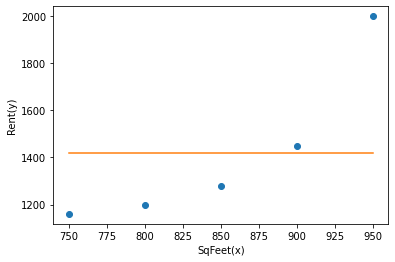

In [ ]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F0'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Vemos que o chute inicial não é horrível mas também não passa perto da maioria dos valores. 


A distância entre nosso chute e o valor real, podemos chamar de residual, e é exatamente ela que nosso aprendiz fraco irá prever.

Como aprendiz fraco iremos utilizar uma árvore de regressão de apenas um corte.

In [ ]:
residual = df['rent']-df['F0']
df['y-F0'] = residual
df.head()

,sqfeet,rent,F0,y-F0
0,750,1160,1418.0,-258.0
1,800,1200,1418.0,-218.0
2,850,1280,1418.0,-138.0
3,900,1450,1418.0,32.0
4,950,2000,1418.0,582.0


Text(0, 0.5, 'y-F0')

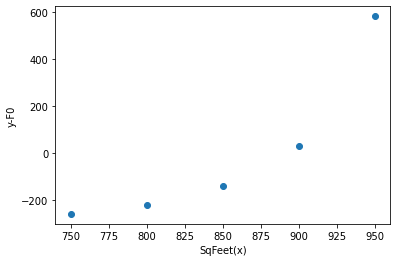

In [ ]:
plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

Para treinar o modelo vou usar a mesma entrada Sqfett, entretanto a saída será considerada y-F0. Ou seja, nosso modelo aprende a prever o erro do passo anterior de certa maneira.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor1 = DecisionTreeRegressor(max_depth = 1)

regressor1.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F0'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'y-F0')

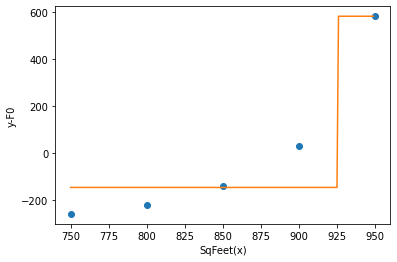

In [ ]:
plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor1.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

Podemos obter F1 somando os dois modelos.

In [ ]:
F1 = df['F0']+regressor1.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F1'] = F1
df.head()

,sqfeet,rent,F0,y-F0,F1
0,750,1160,1418.0,-258.0,1272.5
1,800,1200,1418.0,-218.0,1272.5
2,850,1280,1418.0,-138.0,1272.5
3,900,1450,1418.0,32.0,1272.5
4,950,2000,1418.0,582.0,2000.0


Text(0, 0.5, 'Rent(y)')

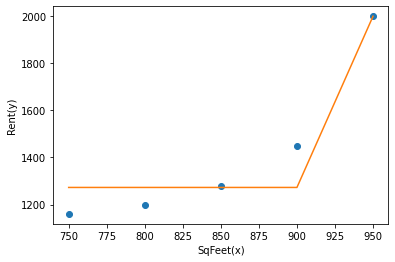

In [ ]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F1'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Agora podemos repetir o mesmo procedimento - calcular o residual de F1 e treinar um modelo para prever este residual.

In [ ]:
residual = df['rent']-df['F1']
df['y-F1'] = residual
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1
0,750,1160,1418.0,-258.0,1272.5,-112.5
1,800,1200,1418.0,-218.0,1272.5,-72.5
2,850,1280,1418.0,-138.0,1272.5,7.5
3,900,1450,1418.0,32.0,1272.5,177.5
4,950,2000,1418.0,582.0,2000.0,0.0


Text(0, 0.5, 'y-F1')

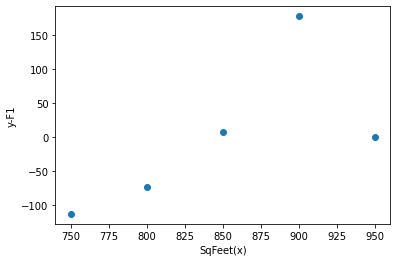

In [ ]:
plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

In [ ]:
regressor2 = DecisionTreeRegressor(max_depth = 1)

regressor2.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F1'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'y-F1')

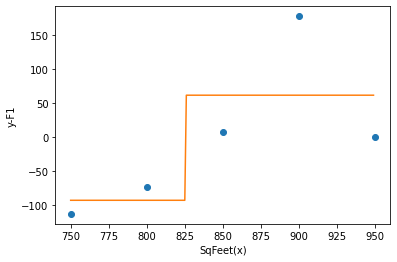

In [ ]:
plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

In [ ]:
F2 = df['F1']+regressor2.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F2'] = F2
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667


Text(0, 0.5, 'Rent(y)')

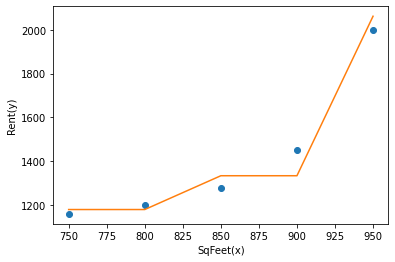

In [ ]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F2'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

In [ ]:
residual = df['rent']-df['F2']
df['y-F2'] = residual
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2,y-F2
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000,-20.000000
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000,20.000000
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667,-54.166667
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667,115.833333
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667,-61.666667


Text(0, 0.5, 'y-F2')

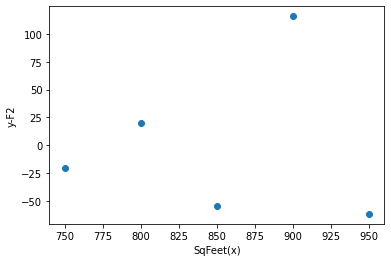

In [ ]:
plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')

plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

In [ ]:
regressor3 = DecisionTreeRegressor(max_depth = 1)

regressor3.fit(df['sqfeet'].to_numpy().reshape(-1,1) ,df['y-F2'].to_numpy().reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'y-F2')

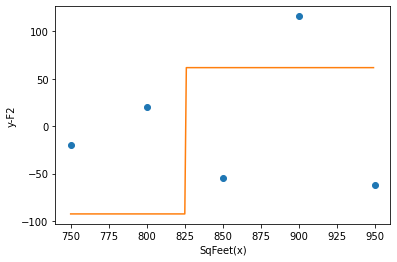

In [ ]:
plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

In [ ]:
F3 = df['F2']+regressor3.predict(df['sqfeet'].to_numpy().reshape(-1,1))
df['F3'] = F3

Text(0, 0.5, 'Rent(y)')

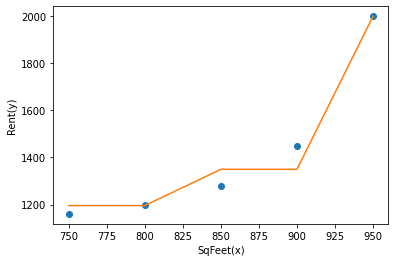

In [ ]:
plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F3'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

Text(0, 0.5, 'Rent(y)')

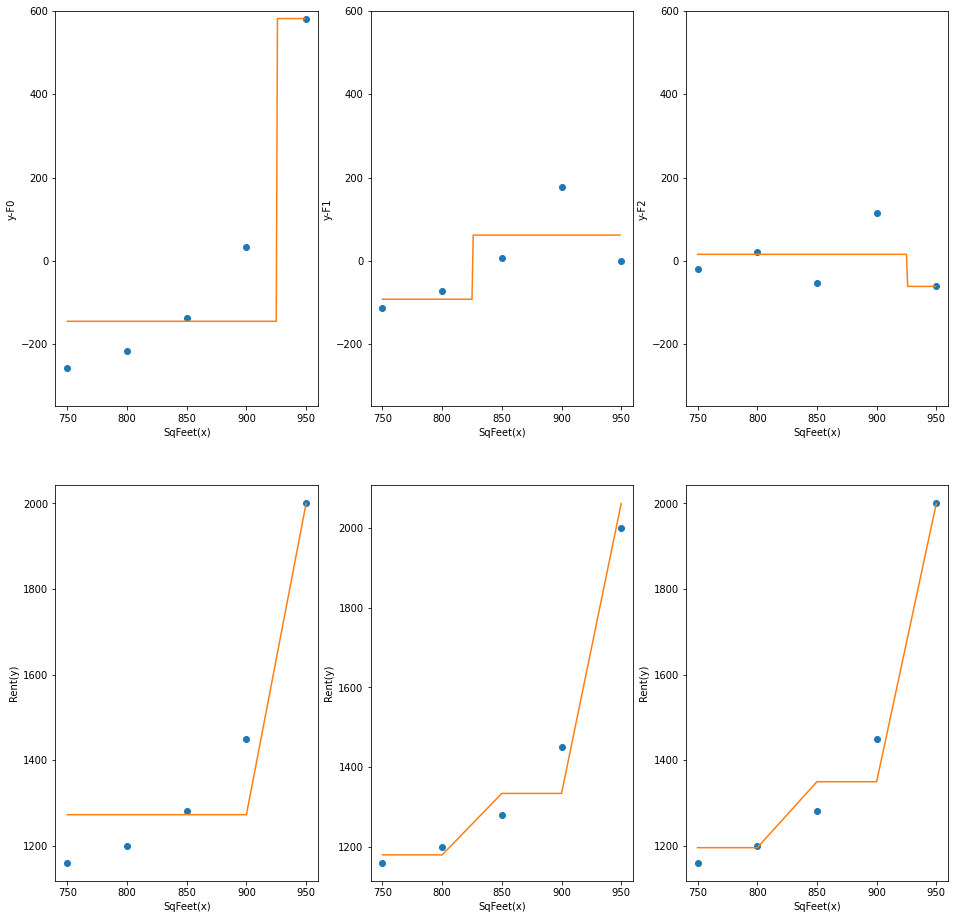

In [ ]:
plt.figure(figsize=(16,16))


plt.subplot(2,3,1)

plt.plot(df['sqfeet'],df['y-F0'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor1.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F0')

plt.subplot(2,3,2)

plt.plot(df['sqfeet'],df['y-F1'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor2.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F1')

plt.subplot(2,3,3)

plt.plot(df['sqfeet'],df['y-F2'],linestyle='None', marker = 'o')
a = np.arange(750,950)
plt.plot(a,regressor3.predict(a.reshape(-1,1)))

plt.ylim(-350,600)


plt.xlabel('SqFeet(x)')
plt.ylabel('y-F2')

plt.subplot(2,3,4)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F1'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

plt.subplot(2,3,5)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F2'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

plt.subplot(2,3,6)

plt.plot(df['sqfeet'],df['rent'],linestyle='None', marker = 'o')
plt.plot(df['sqfeet'],df['F3'])

plt.xlabel('SqFeet(x)')
plt.ylabel('Rent(y)')

In [ ]:
df.head()

,sqfeet,rent,F0,y-F0,F1,y-F1,F2,y-F2,F3
0,750,1160,1418.0,-258.0,1272.5,-112.5,1180.000000,-20.000000,1195.416667
1,800,1200,1418.0,-218.0,1272.5,-72.5,1180.000000,20.000000,1195.416667
2,850,1280,1418.0,-138.0,1272.5,7.5,1334.166667,-54.166667,1349.583333
3,900,1450,1418.0,32.0,1272.5,177.5,1334.166667,115.833333,1349.583333
4,950,2000,1418.0,582.0,2000.0,0.0,2061.666667,-61.666667,2000.000000
